In [2]:
# Data handling, processing and visualisations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
%matplotlib inline

# Couple of sklearn operations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

# Deep learning tools from the keras library
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import layers
from keras.layers.normalization import BatchNormalization
from keras import models
from keras.utils.np_utils import to_categorical
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [4]:
import pickle
#for the pickle files(given dataset)
#the path written is complete since the script was run on MacOS
with open('/Users/saanidhi/Desktop/CV_Problem/train_label.pkl', 'rb') as f:
    label = pickle.load(f)
with open('/Users/saanidhi/Desktop/CV_Problem/train_image.pkl', 'rb') as f2:
    train = pickle.load(f2)
with open('/Users/saanidhi/Desktop/CV_Problem/test_image.pkl', 'rb') as f1:
    test = pickle.load(f1)

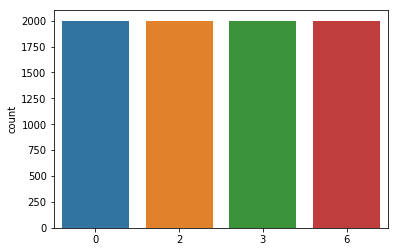

In [5]:


# Plot graph of labels
g = sns.countplot(label)




In [6]:
fac = 255  *0.99 + 0.01
train_imgs = np.asfarray(train) / fac
test_imgs = np.asfarray(test) / fac
label=np.asfarray(label)
X_trainset=train_imgs.reshape(-1,28,28,1)
Test=test_imgs.reshape(-1,28,28,1)
#conversion of training and test images also reshaping the test images

In [7]:
# Set the random seed
random_seed = 2

# Split the train and the validation set for the fitting
X_train, X_val, y_train, y_val = train_test_split(X_trainset, label, test_size = 0.15, random_state=random_seed)
y_binary = to_categorical(y_train)
y_binaryval = to_categorical(y_val)


In [8]:
#defining the model
model = models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dense(7, activation = "softmax"))

In [9]:
#declaring an optimizer
my_optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [10]:
#for compilation of model
model.compile(optimizer=my_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
#to change the data
datagen = ImageDataGenerator(rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             fill_mode='nearest')  
datagen.fit(X_train)

In [12]:
#changing the learning rate after certain number of epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [13]:
#training the model with epochs as 50
history = model.fit_generator(datagen.flow(X_train, y_binary, batch_size=86),
                              epochs=50, validation_data = (X_val, y_binaryval),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 86,
                              callbacks=[learning_rate_reduction])

Epoch 1/50
 - 92s - loss: 0.9933 - acc: 0.6466 - val_loss: 0.8200 - val_acc: 0.7592
Epoch 2/50
 - 77s - loss: 0.7555 - acc: 0.7024 - val_loss: 0.5870 - val_acc: 0.7817
Epoch 3/50
 - 83s - loss: 0.6995 - acc: 0.7195 - val_loss: 0.8935 - val_acc: 0.6975
Epoch 4/50
 - 99s - loss: 0.6233 - acc: 0.7462 - val_loss: 0.4759 - val_acc: 0.8208
Epoch 5/50
 - 70s - loss: 0.5952 - acc: 0.7612 - val_loss: 0.6376 - val_acc: 0.7750
Epoch 6/50
 - 83s - loss: 0.5573 - acc: 0.7758 - val_loss: 0.5585 - val_acc: 0.7883
Epoch 7/50
 - 113s - loss: 0.5538 - acc: 0.7737 - val_loss: 0.4927 - val_acc: 0.8142
Epoch 8/50

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
 - 176s - loss: 0.5342 - acc: 0.7861 - val_loss: 0.5317 - val_acc: 0.7975
Epoch 9/50
 - 79s - loss: 0.4945 - acc: 0.8058 - val_loss: 0.3914 - val_acc: 0.8417
Epoch 10/50
 - 70s - loss: 0.4715 - acc: 0.8130 - val_loss: 0.4236 - val_acc: 0.8283
Epoch 11/50
 - 71s - loss: 0.4572 - acc: 0.8244 - val_loss: 0.5452 - val_acc

In [16]:
#storing the results in result
result=(model.predict(Test,batch_size=None, verbose=0, steps=None))

In [23]:
#reversing the to_categorical 
y_classes = [np.argmax(y, axis=None, out=None) for y in result]


In [24]:
#displaying the value of predicted class
y_classes


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 3,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,


In [35]:
#saving the values into a csv file 
import csv
 
with open('/Users/saanidhi/Desktop/CV_Problem/saanidhiarora.csv', 'w') as csvfile: #since the script was run at macos so complete path needs to be defined
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['Testimageindex', 'Predictedclass'])
    i=0
    for x in y_classes :
       filewriter.writerow([i, x])
       i=i+1


